In [1]:
import numpy as np

% display typeset

# Divisão do tempo

In [2]:
data = np.genfromtxt('stringency_index.csv', delimiter=',')[1:]
serie = [(k) for k in data]

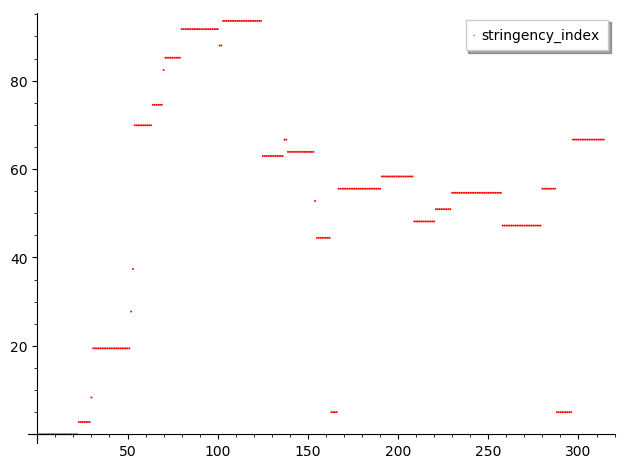

In [3]:
plot = list_plot(serie, color='red', pointsize=2, legend_label='stringency_index', alpha=1)
plot.legend()

show(plot)

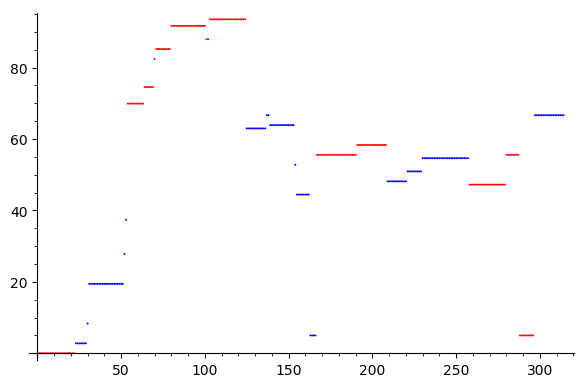

In [4]:
t0 = serie[0  :22 ]
t1 = serie[22 :53 ]
t2 = serie[53 :124]
t3 = serie[124:166]
t4 = serie[166:208]
t5 = serie[208:257]
t6 = serie[257:296]
t7 = serie[296:314]

plot_t0 = list_plot(t0, color='red', pointsize=2, alpha=1)
plot_t1 = list_plot(t1, color='blue', pointsize=2, alpha=1)
plot_t2 = list_plot(t2, color='red', pointsize=2, alpha=1)
plot_t3 = list_plot(t3, color='blue', pointsize=2, alpha=1)
plot_t4 = list_plot(t4, color='red', pointsize=2, alpha=1)
plot_t5 = list_plot(t5, color='blue', pointsize=2, alpha=1)
plot_t6 = list_plot(t6, color='red', pointsize=2, alpha=1)
plot_t7 = list_plot(t7, color='blue', pointsize=2, alpha=1)

show(plot_t0 + plot_t1 + plot_t2 + plot_t3 + plot_t4 + plot_t5 + plot_t6 + plot_t7)

# Escrevendo o Modelo

In [5]:
def achaBt(t, tempos, B0, rho):
    indice = 0
    beta = B0
    while t >= tempos[indice]:
        if indice == 0:
            beta = beta * (1 - rho[indice])
        else:
            beta = beta * (1 - rho[indice] * (tempos[indice] - tempos[indice - 1]) / tempos[indice])
        
        indice += 1
    
    if t == tempos[indice - 1]:
        return beta
    
    beta = beta * (1 - rho[indice] * (t - tempos[indice - 1]) / t)
    return beta

In [6]:
def model(t, comp, params):
    S, E, I, R, D = comp
    B0, Ti, tempos, alpha, rho, f = params
    
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        alpha é o vetor de alphas para cada intervalo de tempo (são constantes)
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        f é o vetor de f(t) para cada intervalo de tempo (são constantes também)
    '''
    
    N = S + E + I + R + D
    
    if t == 0:
        beta = B0
    else:
        beta = achaBt(t, tempos, B0, rho)
    
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD
    ]

In [7]:
B0 = 0.1
Ti = 0.05
tempos = [53 - 31, 124 - 31, 166 - 31, 208 - 31, 257 - 31, 296 - 31, 314 - 31]
alpha = 0.8
rho = [0.1 for i in range(len(tempos))]
f = 0.3

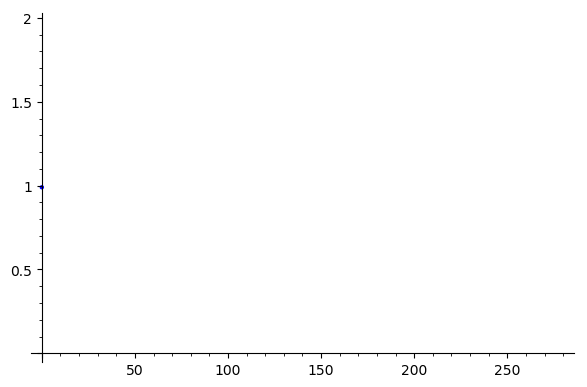

In [8]:
T = ode_solver()
T.function = model
inits = [.99, 0, 1e-6, 0, 0]
tspan = [0, 280]
T.ode_solve(tspan, inits, num_points = 280, params = [B0, Ti, tempos, alpha, rho, f])
model = [(k[0], k[1][3]) for k in T.solution]

T.plot_solution()